# CO543 Mini Project

## Importing the necessary libraries

In [76]:
import cv2
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt, patches

## Importing the Test Dataset

In [55]:
TEST_DATA_PATH = './test-data/'
TRAIN_DATA_PATH = '../CCPD2019/'
test_images = [cv2.imread(file, 0) for file in glob(f'{TEST_DATA_PATH}*')]

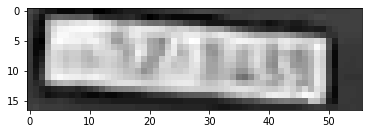

In [37]:
plt.imshow(test_images[0], cmap='gray')

## Importing the Training Dataset

### Dataset Annotations

Annotations are embedded in file name.

A sample image name is "025-95_113-154&383_386&473-386&473_177&454_154&383_363&402-0_0_22_27_27_33_16-37-15.jpg". Each name can be splited into seven fields. Those fields are explained as follows.

- **Area**: Area ratio of license plate area to the entire picture area.

- **Tilt degree**: Horizontal tilt degree and vertical tilt degree.

- **Bounding box coordinates**: The coordinates of the left-up and the right-bottom vertices.

- **Four vertices locations**: The exact (x, y) coordinates of the four vertices of LP in the whole image. These coordinates start from the right-bottom vertex.

- **License plate number**: Each image in CCPD has only one LP. Each LP number is comprised of a Chinese character, a letter, and five letters or numbers.

- **Brightness**: The brightness of the license plate region.

- **Blurriness**: The Blurriness of the license plate region.

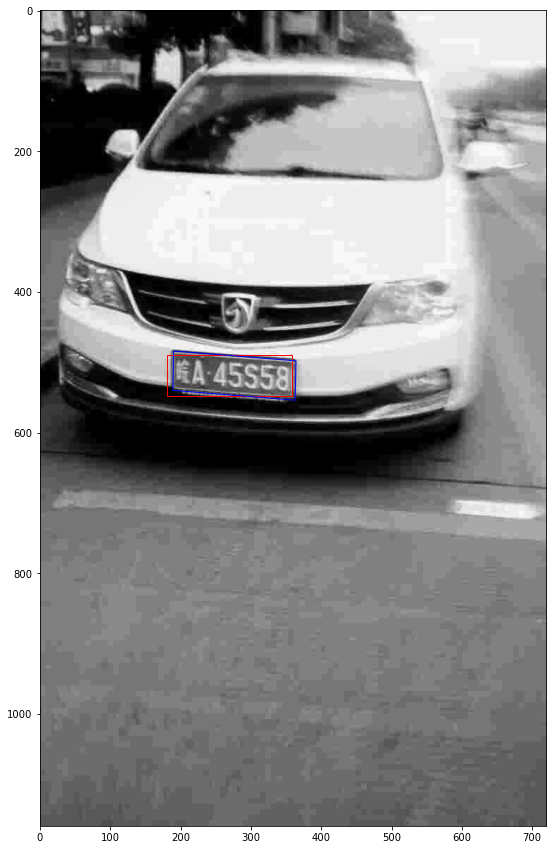

In [85]:
x_train, bboxes, coordinates = [], [], []

with open(f'{TRAIN_DATA_PATH}splits/train.txt', 'r') as f:
    for img_path in f:
        img_path = img_path.strip()
        params = img_path.split('/')[-1].split('-')
        bb_coords = [tuple(int(c) for c in coord.split('&')) for coord in params[2].split('_')]
        coords = [tuple(int(c) for c in coord.split('&')) for coord in params[3].split('_')]
        img = cv2.imread(TRAIN_DATA_PATH + img_path, 0)
        bboxes.append(bb_coords)
        coordinates.append(coords)
        x_train.append(img)
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.imshow(img, cmap='gray')
        ax.add_patch(patches.Rectangle(bb_coords[0], bb_coords[1][0] - bb_coords[0][0], bb_coords[1][1] - bb_coords[0][1], linewidth=1, edgecolor='r', facecolor='none'))
        ax.add_patch(patches.Polygon(coords, linewidth=1, edgecolor='b', facecolor='none'))
        break